#**Stabilization of Artificial Satellite**: 
> ### **Problem Definition:**
>
>Consider a satellite described by the following equations:
\begin{equation}
\left\{\begin{matrix}
m\ddot{r}=m r\dot{\theta}^2  -G\cfrac{m M}{r^2} + u_r
\\ 
mr\ddot{\theta}=-2 m \dot{r}\dot{\theta}+ u_\theta
\end{matrix}\right.
\end{equation}
>
>A problem is to **stabilize** the satellite on the desired orbit of constant radius $r_d = \text{const}$. 




<p><img alt="sattelite" height="450px" src="https://drive.google.com/uc?id=1yvtXC__pJRka_DaK1KKolVcgzu9uo8WF" align="center" hspace="250px" vspace="0px"></p>




###**System parameters**: 
Let us choose the following parameters:

In [1]:
re =	6371e+3 # radius of the earth 
r_d = re + 35e6 # desired orbit

m = 200 # mass of satillite
G = 6.67408e-11 # gravitational constant
M = 5.972e+24 # mass of earth
k = G*M

### **Desired trajectory:**
We may obtain trajectory that is consistent with dynamics by direct substitution of the constant $r_d = \text{const}$:
\begin{equation}
\left\{\begin{matrix}
0= r_d\dot{\theta}_d^2  -\cfrac{k}{r_d^2} + \cfrac{u_{r_d}}{m}
\\ 
\ddot{\theta}_d= \cfrac{u_{\theta_d}}{mr_d}
\end{matrix}\right.
\end{equation}

Moreover if one will consider effortless ($u_{r_d}, u_{\theta_d}$) trajectories the equations above represent the following: 

\begin{equation}
r^3_d \dot{\theta}_d^2  = k \rightarrow \dot{\theta}_d = \sqrt{\frac{k}{r^3_d}}, \quad \theta_d = \dot{\theta}_dt, \quad \ddot{\theta}_d = 0
\end{equation}

Thus the solution is flies along the line of the Earth's equator with constant speed and represent so called equatorial orbit. 

***Note***

To get into equatorial orbit, a satellite must be launched from a place on Earth close to the equator. NASA often launches satellites aboard an Ariane rocket into equatorial orbit from French Guyana. Special case of equatorial orbit is a geosynchronous (sometimes abbreviated GSO) is an orbit around Earth of a satellite with an orbital period that matches Earth's rotation on its axis, which takes one sidereal day (23 hours, 56 minutes, and 4 seconds) 

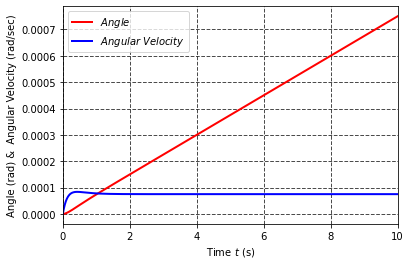

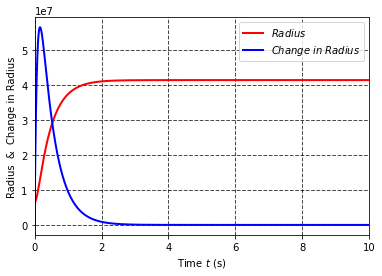

In [2]:
import numpy as np
from scipy.integrate import odeint

def sys_ode(x, t, control, controller_params):
    theta, dtheta, r, dr = x[0], x[1], x[2], x[3] 
    # Control
    u_r, u_theta = control(x, t, controller_params) 
    # State variables
    ddtheta =  ((-2*dr*dtheta)/r) + ((u_theta)/(m*r))      
    ddr = (r*dtheta**2) - (k/r**2) + (u_r/m)
    dx = dtheta, ddtheta, dr, ddr 
    return dx

def control(x, t, controller_params):
    theta, dtheta, r, dr = x[0], x[1], x[2], x[3]

    dtheta_d = np.sqrt(k/r_d**3)
    theta_d = dtheta_d*t

    kp_1 = controller_params['kp1']
    kd_1 = controller_params['kd1']
    kp_2 = controller_params['kp2']
    kd_2 = controller_params['kd2']

    u_r = m*(-r*dtheta**2 + k/r**2 - kd_1*dr - kp_1*(r-r_d))
    u_theta = m*(2*dr*dtheta - r*kd_2*(dtheta-np.sqrt(k/r_d**3)) - r*kp_2*(theta-t*np.sqrt(k/r_d**3)))    

    return u_r, u_theta

tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(0, tf, N) # Create time span

theta_0 = 0
dtheta_0 = 0
r_0 = re
dr_0 = 0

x0 = [theta_0, dtheta_0, r_0, dr_0] # Set initial state 

controller_params = {}
controller_params['kp1'] = 30
controller_params['kd1'] = 15
controller_params['kp2'] = 20
controller_params['kd2'] = 10

sol = odeint(sys_ode, x0, t, args=(control, controller_params,))
theta, dtheta, r, dr = sol[:,0], sol[:,1], sol[:,2], sol[:,3]

from matplotlib.pyplot import *

plot(t, theta,'r', linewidth=2.0, label = r'$Angle$')
plot(t, dtheta,'b', linewidth=2.0, label = r'$Angular$ $Velocity$')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend()
xlim([0, tf])
ylabel(r'Angle (rad) &  Angular Velocity (rad/sec)')
xlabel(r'Time $t$ (s)')
show()

plot(t, r,'r', linewidth=2.0, label = r'$Radius$')
plot(t, dr,'b', linewidth=2.0, label = r'$Change$ $in$ $Radius$')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
legend()
xlim([0, tf])
ylabel(r'Radius  &  Change in Radius')
xlabel(r'Time $t$ (s)')
show()

